In [ ]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt


--2022-04-21 11:04:33--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2022-04-21 11:04:33--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5feb292ee1eec34e11d226dfae.dl.dropboxusercontent.com/cd/0/get/Bj2e86HJUZsP1pxJTufK4ZAX2yJ8eg4_Bmgz8Y8XL-LSUjqgOA-Jc79IKZt5pX3OVxY9az82_iKhiragZuyqxOSXvKpOooVdnuXDSPgAklhUTJUyYAZPRmG6Q6BtSSFyhYd66xCukbU8DCR61m6pJ0YRchFEkt6ProcmlS_a5uHcHQ/file?dl=1# [following]
--2022-04-21 11:04:34--  https://uc5feb292ee1eec34e11d226dfae.dl.dropboxusercontent.com/cd/0/get/Bj2e86HJUZsP1pxJTufK4ZAX2yJ8eg4_Bmgz8Y8XL-LSUjqgOA-Jc79IKZt5pX3OVxY9az82_iK

In [ ]:
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COLORS = ['aliceblue', 'darkkhaki',  'linen','darkmagenta', 'darkolivegreen',  'orchid' , 'honeydew', 'mediumblue','antiquewhite', 'mediumturquoise''gray', 'grey', 'green', 'aqua', 'aquamarine', 'azure']

In [ ]:
import numpy as np

data = list(open("./quora.txt", encoding="utf-8"))
data[23]

'What does entertainment mean for you?\n'

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[23]))

['What', 'does', 'entertainment', 'mean', 'for', 'you', '?']


In [ ]:
data_tok = [tokenizer.tokenize(sent.lower()) for sent in data]

In [ ]:
w2v_model = Word2Vec(data_tok,
                 size=32,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv

In [ ]:
w2v_model.get_vector('woman')

array([-0.7210281 , -1.5643158 , -1.9779009 , -4.4285183 ,  2.0927417 ,
       -1.6303018 ,  2.4646657 ,  0.42504373, -4.311629  , -1.2321494 ,
        5.2416015 , -0.09844459, -0.2742991 ,  0.06836512,  1.5367908 ,
       -0.7425991 , -3.4521444 ,  1.1104354 , -5.128918  , -1.5174376 ,
       -6.2161484 ,  1.6419046 , -2.0745192 ,  1.2803324 ,  2.0520165 ,
        1.2521819 , -3.1913917 ,  1.2235085 , -1.6986475 , -2.6965384 ,
       -1.2903888 , -0.74247086], dtype=float32)

In [ ]:
vecs_w2v = [w2v_model.get_vector('man'), w2v_model.get_vector('woman'),  w2v_model.get_vector('king'), w2v_model.get_vector('queen')]

In [ ]:
sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(vecs_w2v)
X_scaled = scaler.transform(vecs_w2v)

pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [ ]:

fig = go.Figure([go.Scatter3d(x=X_pca[:2,:][:, 0], y=X_pca[:2,:][:, 1],z=X_pca[:2,:][:, 2], mode='lines', line=dict(
                                      color='olive',
                                      width=8)),
go.Scatter3d(x=X_pca[:2,:][1:2, 0], y=X_pca[:2,:][1:2, 1],z=X_pca[:2,:][1:2, 2], mode='markers', marker={'size': 7,
              'opacity': 1,
              'color': 'olive',
              'symbol' : 'diamond'}  ),
              go.Scatter3d(x=X_pca[2:,:][:, 0], y=X_pca[2:,:][:, 1],z=X_pca[2:,:][:, 2], mode='lines', line=dict(
                                      color='powderblue',
                                      width=8)),
go.Scatter3d(x=X_pca[2:,:][1:2, 0], y=X_pca[2:,:][1:2, 1],z=X_pca[2:,:][1:2, 2], mode='markers', marker={'size': 7,
              'opacity': 1,
              'color': 'powderblue',
              'symbol' : 'diamond'}  )])

In [ ]:
powderblue

In [ ]:
fig.show()

In [ ]:


scaler2d = StandardScaler()
scaler2d.fit(vecs_w2v)
X_scaled = scaler2d.transform(vecs_w2v)

pca2d = PCA(n_components=2)
pca2d.fit(X_scaled)
X_pca = pca2d.transform(X_scaled)

In [ ]:

fig = go.Figure([
                  go.Scatter(x=X_pca[:2,:][:, 0], y=X_pca[:2,:][:, 1], mode='lines', line=dict(
                                      color='olive',
                                      width=3)),
                  go.Scatter(x=X_pca[:2,:][1:2, 0], y=X_pca[:2,:][1:2, 1], mode='markers', marker={'size': 7,
                                'opacity': 1,
                                'color': 'olive',
                                'symbol' : 'diamond'}  ),

                  go.Scatter(x=X_pca[2:,:][:, 0], y=X_pca[2:,:][:, 1], mode='lines', line=dict(
                                                        color='powderblue',
                                                        width=3)),
                  go.Scatter(x=X_pca[2:,:][1:2, 0], y=X_pca[2:,:][1:2, 1], mode='markers', marker={'size': 7,
                                'opacity': 1,
                                'color': 'powderblue',
                                'symbol' : 'diamond'}  )
                  ])

In [ ]:
X_pca

array([[ 2.52095936, -2.55614175],
       [ 6.47985297,  1.23959857],
       [-5.27607158, -2.13706516],
       [-3.72474075,  3.45360835]])

In [ ]:
fig.show()

In [ ]:
projections[0]

array([259.59018, -27.44924, 263.98065], dtype=float32)

**TASK 1**

cosine and distance

In [ ]:
import requests, json

url = 'https://raw.githubusercontent.com/evgeniyako-edu/corpora/master/data/colors/xkcd.json'
response = requests.get(url)

raw_data = json.loads(response.text)

In [ ]:
def hex_to_rgb(color_hex):
    color_hex = color_hex.lstrip("#")
    return [int(color_hex[:2], 16), int(color_hex[2:4], 16), int(color_hex[4:6], 16)]

In [ ]:
colors = dict()

for item in raw_data['colors']:
    colors[item['color']] = hex_to_rgb(item['hex'])

In [ ]:
import numpy as np

def distance(color1, color2):
  return np.sqrt(np.sum([(x-y)**2 for x, y in zip(color1, color2)]))

In [ ]:
def find_n_closest(colors, new_color, n=5):
  closest = []
  for key in sorted(colors.keys(), key=lambda x: distance(new_color, colors[x]))[:n]:
    closest.append(key)
  return closest

In [ ]:
closest

[[102, 30, 162],
 'purple',
 'indigo blue',
 'purple/blue',
 'blue purple',
 'violet blue',
 'blueberry',
 'darkish purple',
 'blue with a hint of purple',
 'bluey purple',
 'blurple']

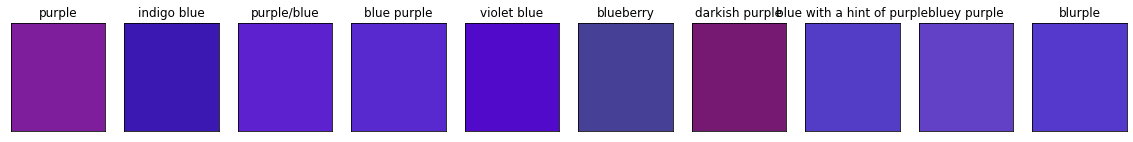

In [ ]:
n = 10
new_color = [102, 30, 162]

closest = find_n_closest(colors, new_color, n)

fig, axs = plt.subplots(1, n, figsize=(n*2, 2))
for ax, c in zip(axs, closest):
  if type(c)== str:
    ax.set_facecolor('xkcd:'+c)
  else:
    ax.set_facecolor(color=c)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(c)

In [ ]:
def euclidian_norm(color):
  return np.sqrt(np.sum(x**2 for x in color))

def dot_prod(color1, color2):
  return np.sum([x*y for x, y in zip(color1, color2)])

def cosine(color1, color2):
  nom = dot_prod(color1, color2)

  n1 = euclidian_norm(color1)
  n2 = euclidian_norm(color2)
  denom =  n1 * n2
  return nom/denom

In [ ]:
def find_n_closest_cosine(colors, new_color, n=5):
  closest = []
  nc = (new_color[0]/256,new_color[1]/256, new_color[2]/256)
  closest = [nc]
  # print(nc)
  for key in sorted(colors.keys(), key=lambda x: cosine(new_color, colors[x]))[:n]:
    closest.append(key)
  return closest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in true_divide



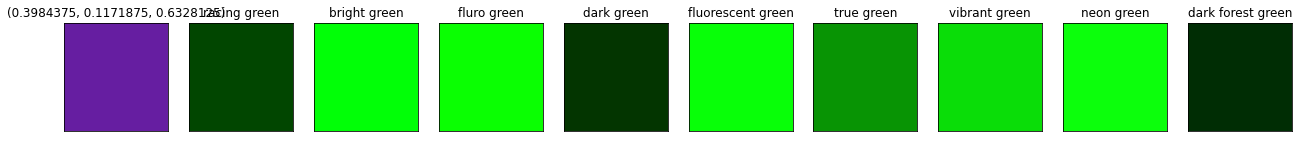

In [ ]:
n = 10
new_color = [102, 30, 162]

closest_cosine = find_n_closest_cosine(colors, new_color, n)

fig, axs = plt.subplots(1, n, figsize=((n+1)*2, 2))
for ax, c in zip(axs, closest_cosine):
  if type(c)== str:
    ax.set_facecolor('xkcd:'+c)
  else:
    ax.set_facecolor(color=c)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(c)

**TASK 2**

Projection on aa hyerplane

In [ ]:
def projection(vec, normal):
   return normal * (vec @ normal)/ (normal @ normal)

def projection_on_plane (vec, normal):
   return vec -  projection(vec, normal)

def surface_func (w, b, xx,yy ):
   z = lambda xx, yy: (-b - w[0] * xx - w[1] * yy) /w[2]
   return z(xx,yy)

In [ ]:
def get_coords(vec):
   X = np.array([[0.,0.,0.], vec[:, 0]]).T
   x, y, z = X[0,:], X[1, :], X[2, :]
   return x, y, z

In [ ]:
surface_vector = np.array([[-0.3,-0.04, 0.5]]).T
surfuce_intersect = 0

In [ ]:
surface_vector = np.random.random((3,1))
surfuce_intersect = 0# np.random.random((1,))[0]

In [ ]:
surface_vector

array([[0.55186036],
       [0.640045  ],
       [0.91713109]])

In [ ]:
def surface_fig(surface_vector, surfuce_intersect):
    x,y,z = get_coords (surface_vector)
    tmp = np.linspace(-5,5,10)
    xx,yy = np.meshgrid(tmp,tmp)
    fig = go.Figure([
           go.Surface(x=xx, y=yy, z=surface_func (surface_vector, surfuce_intersect, xx,yy ), opacity=.5, showscale=True,
                       colorscale=[[0, 'grey']]),
          go.Scatter3d(x=x*5, y=y*5,z=z*5, mode='lines', line=dict(
                                                color='grey',
                                                width=8)),
          go.Scatter3d(x=x[1:]*5, y=y[1:]*5,z=z[1:]*5, mode='markers', marker={'size': 7,
                        'opacity': 1,
                        'color': 'grey',
                        'symbol' : 'diamond'}  )]
               )
    fig.show()
    return fig

In [ ]:
f = surface_fig(surface_vector, surfuce_intersect)

In [ ]:
def draw_vectors(fig, vectors):
  for i, vec in enumerate(vectors):
    # print(vec)
    x,y,z = get_coords(np.array([vec]).T)
    fig.add_trace(go.Scatter3d(x=x*5, y=y*5,z=z*5, mode='lines', line=dict(
                                                color=COLORS[i],
                                                width=8)))
    fig.add_trace(go.Scatter3d(x=x[1:]*5, y=y[1:]*5,z=z[1:]*5, mode='markers', marker={'size': 7,
                        'opacity': 1,
                        'color': COLORS[i],
                        'symbol' : 'diamond'}  ))

          # )

  fig.show()
  return fig


In [ ]:
vectors = np.random.random_sample((4,3)) #np.random.random((4,3))

In [ ]:
draw_vectors(f, vectors)

In [ ]:
def draw_projections(fig, vectors, surface_vector):
  for i, vec in enumerate(vectors):
    proj = projection_on_plane(vec, surface_vector[:,0])
    x,y,z = get_coords(np.array([proj]).T)
    fig.add_trace(go.Scatter3d(x=x*5, y=y*5,z=z*5, mode='lines', line=dict(
                                                color=COLORS[i],
                                                width=8)))
    fig.add_trace(go.Scatter3d(x=x[1:]*5, y=y[1:]*5,z=z[1:]*5, mode='markers', marker={'size': 7,
                        'opacity': 1,
                        'color': COLORS[i],
                        'symbol' : 'diamond'}  ))

          # )

  fig.show()
  return fig


In [ ]:
draw_projections(f, vectors, surface_vector)

**TASK 3**

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=3,
                  random_state=0)

In [ ]:
# z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]
def surface_func (w, b, xx,yy ):
   z = lambda xx, yy: (-b - w[0] * xx - w[1] * yy) /w[2]
   return z(xx,yy)






def draw_3d (w, b, X, colors):
  tmp = np.linspace(-2,2,10)
  xx,yy = np.meshgrid(tmp,tmp)
  fig = go.Figure([go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode="markers", showlegend=False,
                                marker=dict(color=colors)
                        ),
           go.Surface(x=xx, y=yy, z=surface_func (w, b, xx,yy ), opacity=.5, showscale=False,
                      surfacecolor=np.zeros(xx.shape), colorscale=[[0, 'blue']])])

  fig.update_layout(
    scene = dict(zaxis = dict(nticks=4, range=[-2,5.9])))
  fig.show()

In [ ]:
def random_coloring(w, b, X):

  return [f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})' for _ in range(X.shape[0])]



In [ ]:
w =  np.array([[0.85486757],
        [0.27359117],
        [0.54506031]]) #np.random.random((n,1))
b =   0.023607449804923242 #np.random.random((1,))[0]



In [ ]:
colors = random_coloring(w, b, X)

In [ ]:
draw_3d (w, b, X, colors)

In [ ]:
def coloring(w, b, X):
  #'rgb(150, 208, 252)',
#  'rgb(160, 17, 53)',

  color_1 = 'rgb(150, 208, 252)'  #f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})'
  color_2 = 'rgb(160, 17, 53)' #f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})'
  colors = []
  for i in range(X.shape[0]):
    if (X[i, :] @ w + b) < 0.0:
      colors.append(color_1)
    if (X[i, :] @ w + b)  >= 0.0:
      colors.append(color_2)
  return colors

In [ ]:
colors = coloring(w, b, X)

In [ ]:
draw_3d (w, b, X, colors)

In [ ]:
from IPython.display import clear_output

In [ ]:
def gradients (y_Hat, X, y):
   m = X.shape[0]
   dw = (X.T @ (y_hat - y)) /m
   db = np.sum(y_hat - y) / m
   return dw, db

def loss(y_hat, y):
    l = -np.mean(y * np.log( y_hat)+ (1-y) * np.log((1- y_hat)))
    return l

def  sigmoid(w,X, b):

    linear  =  X @ w + b
    # print(linear)
    sigm = 1.0 /(1.0 + np.exp(-linear))
    return sigm

def normalize(X):


    m, n = X.shape

    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

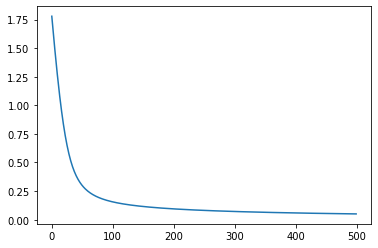

In [ ]:

lr = 0.01
epochs = 500
m, n = X.shape



# Reshaping y.
y = y.reshape(m,1)

# Normalizing the inputs.
x = normalize(X)

# Empty list to store losses.
losses = []

# Training loop.
for epoch in range(epochs):



    # prediction.
    y_hat = sigmoid(w, X,  b)

    # Calculating loss and appending it in the list.
    l = loss(y_hat, y)
    losses.append(l)

    # Getting the gradients of loss w.r.t parameters.
    dw, db = gradients (y_hat, X, y)

    # Updating the parameters.
    w -= lr*dw
    b -= lr*db

    clear_output(wait = True)

    plt.plot(losses)
    plt.show()




In [ ]:
colors_trained = coloring(w, b, X)


In [ ]:
draw_3d (w, b, X, colors_trained)

In [ ]:
w

array([[ 0.41888549],
       [-1.2653048 ],
       [ 0.47919706]])

In [ ]:
b

-0.04965675368701184

In [ ]:
import numpy as np
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X,y)

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear')

In [ ]:
svc.coef_[0]

array([-0.10128499, -0.83799293, -0.08422382])

In [ ]:
svc.intercept_[0]

1.8498273786120119

In [ ]:
colors_trained_svc = coloring(svc.coef_[0], svc.intercept_[0], X)

In [ ]:
draw_3d (svc.coef_[0], svc.intercept_[0], X, colors_trained)